# Моделирование волны

## Общие понятия

<table>
  <tr>
    <td align="center">
      <img src="imgs/wave.png" width="100%" height="50%" alt="Image description">
    </td>
    <td align="center">
      <img src="imgs/waves.png" width="100%" height="50%" alt="Image description">
    </td>
  </tr>
</table>

__Период__ - это время, которое требуется, чтобы пройти волну.

__Частота f__, - это обратная величина от периода (количество раз какой-то паттерн повторяется за заданное время в герцах)
1 Гц = 1/с

Пример: человеческий слух слышит частоту не ниже 20 Гц, то есть паттерн повторяется 20 раз в секунду.

Если f = 20 Hz, тогда период T = 1/20 = 0.05 с

Если f = 1 Hz, тогда T = 1/1 = 1 с, что значит полный цикл завершается за 1 секунду.

__Дискретизация__ - это процесс преобразования непрерывного сигнала в последовательность (в аудио - процесс записи звука в цифровой формат. Чем выше __частота дискретизации__ (sampling rate), тем больше берется точек изначального сигнала, что делает запись более точной).

Частота дискретизации измеряется в Гц. Если частота дискретизации равна 44.1 КГц (44 100 Гц), это значит, что сигнал измерялся 44 100 раз в секунду.

__Фаза__ - это положение волны в определенный момент времени относительно ее начала (0 секунд).

Фазу измеряют в градусах или радианах. Один полный цикл волны = 360 градусов = 2 pi радиан

__Угловая частота (w)__ - это скорость изменения фазы волны, выраженная в радианах в секунду. w = 2 * pi * f

## Дискретное преобразование Фурье, преобразование Фурье

**_Definition_**
Дискретное преобразование Фурье преобразует последовательность $N$ комплексных чисел $\{x_n\}$ := $x_0, x_1, ..., x_{N-1}$ в другую последовательность комплексных чисел $\{X_{k}\}$ := $X_0, X_1, ... X_{N-1}$

$$
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i2\pi \frac{k}{N}n} \quad 
$$

Оно является дискретным аналогом формулы коэффициентов ряда Фурье

$$
C_k = \frac{1}{P} \int_{P} x(t) e^{-i2\pi \frac{k}{P}t} dt.
$$

**_Note_** Преобразование Фурье конвертирует сигнал из изначальной области определения (обычно время или пространство) в представление в частотной области определения и наоборот. При этом мы не теряем значимой информации об изначальном сигнале.

**_Example_**
**Применение DFT к последовательности длины N = 4**

$$
\mathbf{x} = 
\begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
x_3
\end{bmatrix}
=
\begin{bmatrix}
1 \\
2 - i \\
-i \\
-1 + 2i
\end{bmatrix}.
$$

**Расчет DFT Eq.1**

$$
\begin{aligned}
X_0 &= e^{-i2\pi 0 \cdot 0/4} \cdot 1 + e^{-i2\pi 0 \cdot 0/4} \cdot (2 - i) + e^{-i2\pi 0 \cdot 0/4} \cdot (-i) + e^{-i2\pi 0 \cdot 0/4} \cdot (-1 + 2i) = 2 \\
X_1 &= e^{-i2\pi 1 \cdot 1/4} \cdot 1 + e^{-i2\pi 1 \cdot 1/4} \cdot (2 - i) + e^{-i2\pi 1 \cdot 1/4} \cdot (-i) + e^{-i2\pi 1 \cdot 1/4} \cdot (-1 + 2i) = -2 - 2i \\
X_2 &= e^{-i2\pi 2 \cdot 2/4} \cdot 1 + e^{-i2\pi 2 \cdot 2/4} \cdot (2 - i) + e^{-i2\pi 2 \cdot 2/4} \cdot (-i) + e^{-i2\pi 2 \cdot 2/4} \cdot (-1 + 2i) = -2i \\
X_3 &= e^{-i2\pi 3 \cdot 3/4} \cdot 1 + e^{-i2\pi 3 \cdot 3/4} \cdot (2 - i) + e^{-i2\pi 3 \cdot 3/4} \cdot (-i) + e^{-i2\pi 3 \cdot 3/4} \cdot (-1 + 2i) = 4 + 4i
\end{aligned}
$$

**приводит к**

$$
\mathbf{X} = 
\begin{bmatrix}
X_0 \\
X_1 \\
X_2 \\
X_3
\end{bmatrix}
=
\begin{bmatrix}
2 \\
-2 - 2i \\
-2i \\
4 + 4i
\end{bmatrix}.
$$

**_Definition_** Обратное преобразование Фурье

$$
x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k \cdot e^{i2\pi \frac{k}{N}n} \quad
$$

In [1]:
import numpy as np

In [2]:
x = np.array([1, 2 - 1j, -1j, -1 + 2j])
N = len(x)

In [3]:
n = np.arange(N)[:, None]  # Create a column vector of n
n

array([[0],
       [1],
       [2],
       [3]])

In [4]:
k = np.arange(N)[None, :]  # Create a row vector of k
k

array([[0, 1, 2, 3]])

In [5]:
W = np.exp(-2j * np.pi * k * n / N)  # Calculate the DFT matrix using broadcasting
W.round(2)

array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
       [ 1.+0.j,  0.-1.j, -1.-0.j, -0.+1.j],
       [ 1.+0.j, -1.-0.j,  1.+0.j, -1.-0.j],
       [ 1.+0.j, -0.+1.j, -1.-0.j,  0.-1.j]])

In [6]:
X = x @ W
X.round(2)

array([ 2.+0.j, -2.-2.j,  0.-2.j,  4.+4.j])

In [7]:
def dft(x: np.ndarray[np.complex128]) -> np.ndarray[np.complex128]:
    """
    Вычисляет дискретное преобразование Фурье (ДПФ) входного сигнала.

    Функция реализует ДПФ, используя матричное умножение для эффективного вычисления.

    Параметры
    ----------
    x : np.ndarray[np.complex128]
        Входной сигнал как массив комплексных чисел

    Возвращает
    ----------
    np.ndarray[np.complex128]
        Результат ДПФ - массив комплексных чисел той же длины, что и входной сигнал

    Пример
    -------
    >>> x = np.array([1+0j, 2+0j, 3+0j, 4+0j])
    >>> dft(x)
    array([ 10.+0.j,  -2.+2.j,  -2.+0.j,  -2.-2.j])
    """
    N = len(x)
    n = np.arange(N)[:, None]  # Create a column vector of n
    k = np.arange(N)[None, :]  # Create a row vector of k
    W = np.exp(-2j * np.pi * k * n / N)  # Calculate the DFT matrix using broadcasting
    return x @ W

In [8]:
x = np.array([1, 2 - 1j, -1j, -1 + 2j])
X = dft(x)
X.round(2)

array([ 2.+0.j, -2.-2.j,  0.-2.j,  4.+4.j])

## Быстрое преобразование Фурье

**_Definition_** Быстрое преобразование Фурье (БПФ) - это алгоритм расчета дискретного преобразования Фурье (ДПФ) или обратного ДПФ, который позволяет снизить сложность с $O(n^2)$ (наивная имплементация ДПФ) до $O(nlogn)$

Существует множество вариаций быстрого преобразования Фурье, однако наиболее распространенная – это алгоритм Cooley–Tukey.

$$
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i2\pi \frac{k}{N}n} \quad 
$$

Алгоритм Cooley-Tukey

1) Рассчитываем ДФТ четных элементов последовательности
$(x_{2m} = x_0, x_2, ... , x_{N-2})$ и для нечетных $(x_{2m+1} = x_1, x_3, ..., x_{N-1})$, в конце соединим результаты, чтобы получить все элементы в одной последовательности. _(разделяй и властвуй)_

2) Эта идея теперь может быть применена рекурсивно, чтобы снизить сложность до $O(NlogN)$. Замечание: такая упрощенная форма подразумевает, что N - это степень двойки. Это не является проблемой, так как можно изменить sample rate или просто добавить zero-padding.

$$
X_k = \sum_{m=0}^{N/2-1} x_{2m} \cdot e^{-i2\pi \frac{k}{N}2m} \quad + \sum_{m=0}^{N/2-1} x_{2m+1} \cdot e^{-i2\pi \frac{k}{N}(2m + 1)} \quad
$$

$$
X_k = \underbrace{\sum_{m=0}^{N/2-1} x_{2m}e^{-\frac{2\pi i}{N/2}mk}}_{\text{DFT of even-indexed part of } x_n} + e^{-\frac{2\pi i}{N}k}\underbrace{\sum_{m=0}^{N/2-1} x_{2m+1}e^{-\frac{2\pi i}{N/2}mk}}_{\text{DFT of odd-indexed part of } x_n} = E_k + e^{-\frac{2\pi i}{N}k}O_k
$$

Это можно показать (из свойства периодчности комплексной экспоненты), что можно получить ДПФ для всего спектра значений, а не для $(N/2 - 1)$

$$
X_k = E_k + e^{-\frac{2\pi i}{N}k}O_k
$$
$$
X_{k+\frac{N}{2}} = E_k - e^{-\frac{2\pi i}{N}k}O_k
$$

In [9]:
def fft(x: np.ndarray[np.complex128]) -> np.ndarray[np.complex128]:
    """
    Быстрое преобразование Фурье (БПФ) с использованием алгоритма Cooley-Tukey.
    
    Параметры:
    ----------
    x : np.ndarray[np.complex128]
        Входной массив комплексных чисел
        
    Возвращает:
    -----------
    np.ndarray[np.complex128]
        Результат БПФ
    """
    original_N = len(x)
    N = len(x)
    
    # Дополняем входной массив нулями до ближайшей степени двойки
    if N & (N-1) != 0:
        next_power_2 = 1 << (N - 1).bit_length()
        x = np.pad(x, (0, next_power_2 - N), mode='constant')
        N = next_power_2
    
    # Базовый случай рекурсии
    if N == 1:
        return x
    
    # Разделяем на четные и нечетные индексы
    even = fft(x[::2])
    odd = fft(x[1::2])
    
    # Вычисляем комплексные экспоненты
    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    
    # Объединяем результаты по формуле X_k = E_k + e^(-2πik/N)O_k
    result = np.concatenate([
        even + factor[:N//2] * odd,      # Для k от 0 до N/2-1
        even + factor[N//2:] * odd       # Для k от N/2 до N-1
    ])
    
    # Возвращаем только нужное количество элементов
    return result[:original_N]

In [10]:
fft(x).round(2)

array([ 2.+0.j, -2.-2.j,  0.-2.j,  4.+4.j])

## Свёртка

**_Definition_**  Пусть $x(t)$ и $y(t)$ две данные функции. Их свёртка определяется как

$$(x * y)(t) = \int_{-\infty}^{\infty} x(\tau) y(t -  \tau) d \tau.$$

это математическая операция, которая объединяет две функции, создавая новую функцию, описывающую, как одна функция "накладывается" на другую.



__Что происходит в формуле__

$x(τ)$: первая функция рассматривается в момент времени $τ$.

$y(t - τ)$: вторая функция сдвигается по времени на $t$ и отражается относительно оси времени.
dτ: интеграл складывает значения произведений $x(τ)$ и $y(t - τ)$ по всем значениям $τ$ от $-∞$ до $+∞$.

__Интуиция:__

Представьте, что одна из функций (например, $y(t)$) является "фильтром", который мы накладываем на другую функцию $x(t)$.
На каждом шаге t, мы вычисляем, насколько $y(t)$ соответствует участку $x(t)$, перемножая их значения и суммируя результат.

__Пример:__

Если $x(t)$ описывает сигнал, а $y(t)$ отклик системы, то свертка $(x * y)(t)$ дает выходной сигнал системы.



**_Theorem_** Теорема о свёртке. Широко известный факт: *свёртка* во временном пространстве (time domain) эквивалентна *произведению* в частотном пространстве (frequency domain). 

- Преобразование из одного протсранства в другое осуществляется с помощью преобразования Фурье:

$$
\widehat{x}(w) = (\mathcal{F}(x))(w) = \int_{-\infty}^{\infty} e^{i w t} x(t) dt.
$$

- Тогда

$$
\mathcal{F}(x * y) = \mathcal{F}(x) \mathcal{F}(y).
$$

- Таким образом, алгоритм вычисленеия свёртки можно записать следующим образом:


1. Вычислить преобразование Фурье от $x(t)$ и $y(t)$. 
2. Вычислить их произведение
3. Применить к результапту обратное преобразование Фурье

Вернемся к свертке
$$
(x * y)(t) = \int_{-\infty}^{\infty} x(\tau) y(t -  \tau) d \tau.
$$

**_Definition_** Операция дискретной свертки определяется как
$$
z_i = \sum_{j=0}^{n-1} x_j y_{i - j}
$$

<div style="text-align: center;">
  <img src="imgs/conv1d.gif" width="50%" height="50%" alt="Image description">
</div>

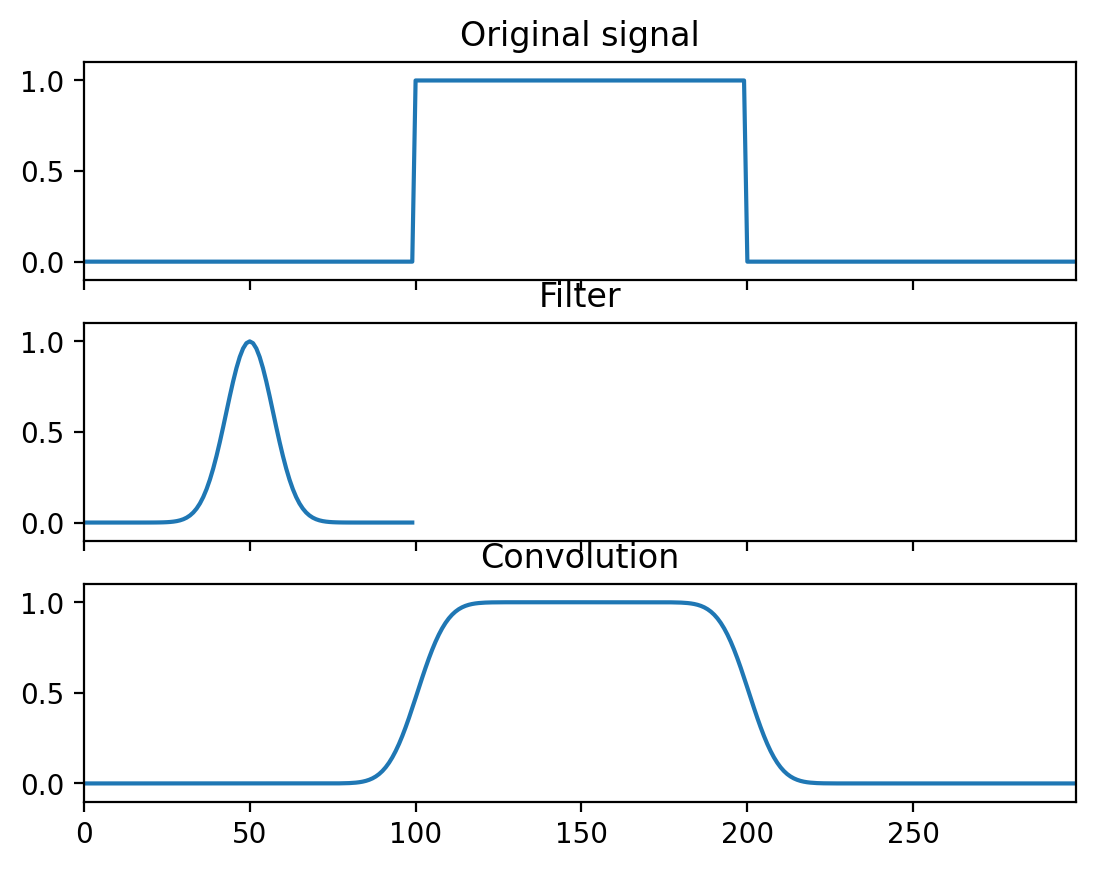

In [11]:
from scipy import signal
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

alpha = 0.01
sig = np.repeat([0, 1, 0], 100)
filt = np.exp(-alpha * (np.arange(100) - 50)**2)
filtered = signal.convolve(sig, filt, mode='same') / sum(filt)

fig, (ax_orig, ax_filt, ax_filtered) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.margins(0, 0.1)
ax_filt.plot(filt)
ax_filt.margins(0, 0.1)
ax_filtered.plot(filtered)
ax_filtered.margins(0, 0.1)

ax_orig.set_title('Original signal')
ax_filt.set_title('Filter')
ax_filtered.set_title('Convolution');

**Дискретную свёртку** можнопредставить как умножение матрицы на вектор:

$$z_i = \sum_{j=0}^{n-1} x_j y_{i - j}, \Leftrightarrow z = Ax$$

где элементы матрицы $A$ равны $a_{ij} = y_{i-j}$, то есть они зависят только от разности между индексами строки и столбца.

## Тёплицевы матрицы: определение

**_Definition_** Матрица называется **Тёплицевой**, если её элементы определены как

$$a_{ij} = t_{i - j}.$$

- Тёплицева матрица полностью определяется первой строкой и первым столбцом (то есть $2n-1$ параметр).

- Это плотная матрица, однако она имеет структуру, то есть определяется $\mathcal{O}(n)$ параметрами

- Основная операция для вычисления дискретной свёртки – это произведение Тёплицевой матрицы на вектор.

/var/folders/10/nstm__m90jv6lxthpqgzvvbm0000gn/T/ipykernel_70175/2404220930.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  cat = imageio.imread('imgs/cat.jpg')


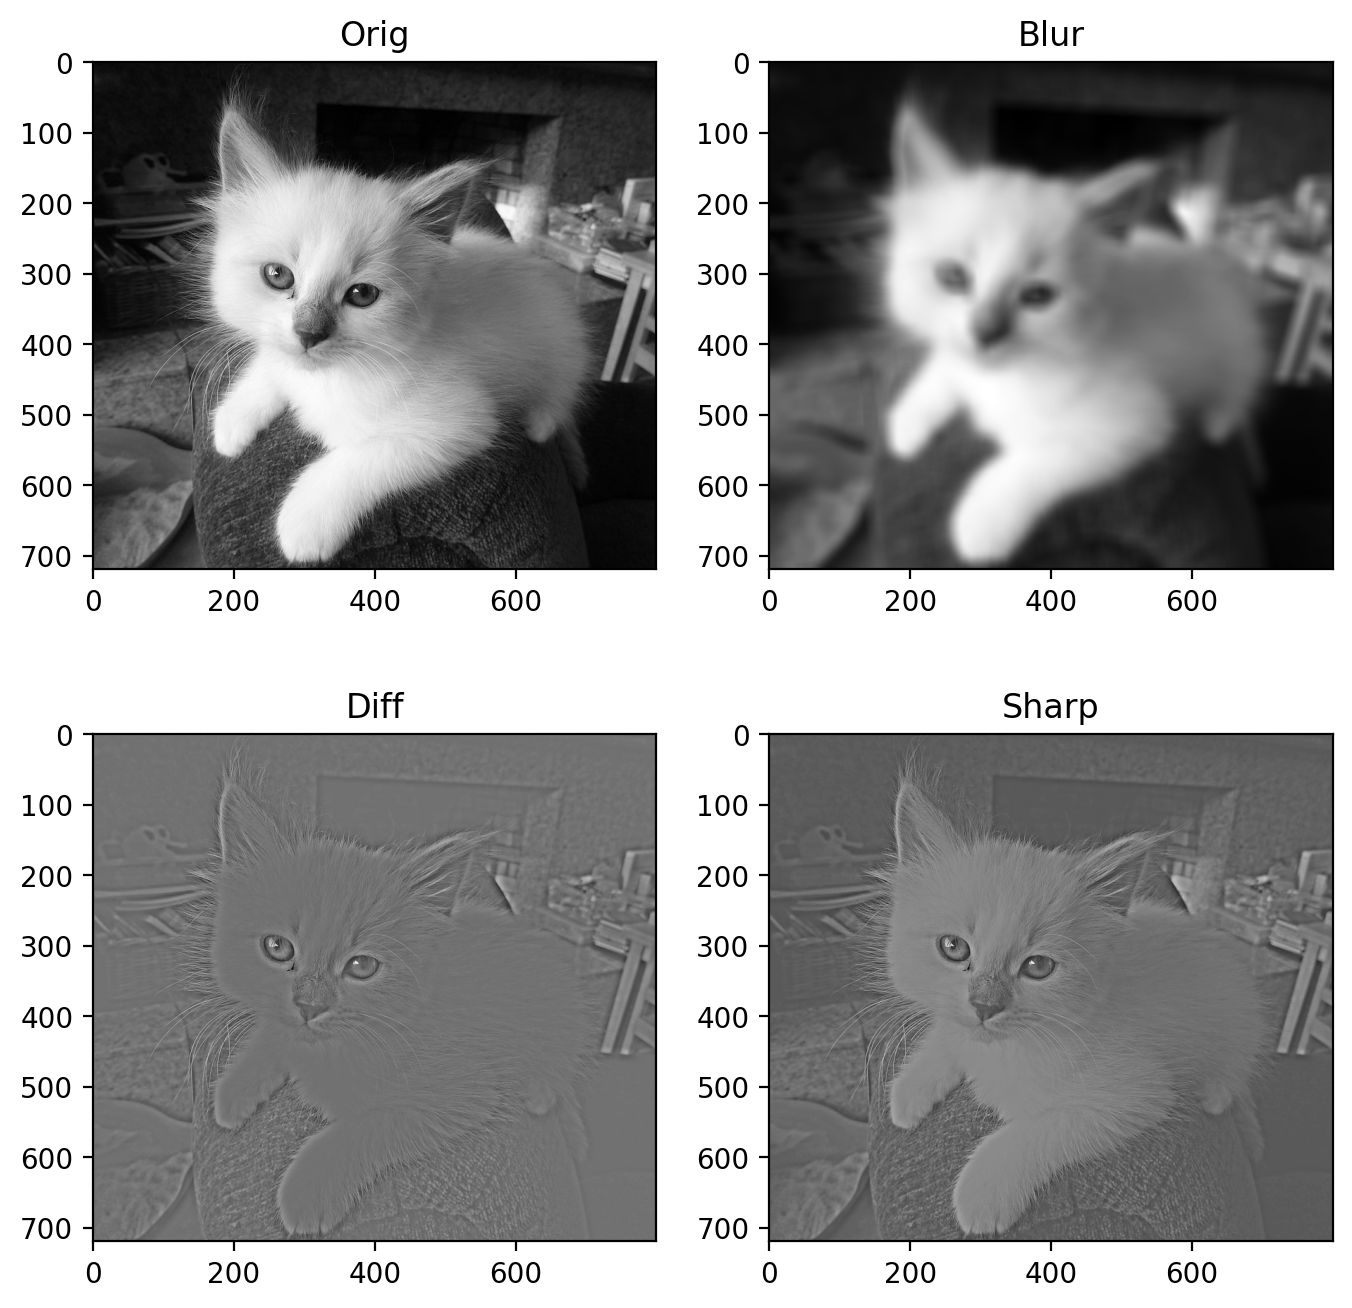

In [12]:
from scipy import signal
import imageio

cat = imageio.imread('imgs/cat.jpg')
if len(cat.shape) == 3:
    cat = np.mean(cat, axis=2)

# Обозначим фильтр
filter_size = 20
filter_blur = np.ones((filter_size, filter_size)) / filter_size ** 2

blurred = signal.convolve2d(cat, filter_blur, boundary='symm', mode='same')

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0, 0].imshow(cat, cmap='gray')
ax[0, 0].set_title('Orig')

ax[0, 1].imshow(blurred, cmap='gray')
ax[0, 1].set_title('Blur')

difference = cat - blurred
ax[1, 0].imshow(difference, cmap='gray')
ax[1, 0].set_title('Diff')

sharpened = 3 * difference + cat
ax[1, 1].imshow(sharpened, cmap='gray')
ax[1, 1].set_title('Sharp');

## Ганкелевы матрицы: определение
**_Defenition_** **Ганкелевы матрицы** — это матрицы, у которых элементы, расположенные на каждой диагонали (параллельной главной), одинаковы. То есть элементы матрицы зависят только от разности индексов строк и столбцов. 

Обычно Ганкелева матрица имеет вид:

$$
H =
\begin {pmatrix} 
h_0 & h_1 & h_2 & \dots & h_{n-1} \\
h_1 & h_2 & h_3 & \dots & h_n \\
h_2 & h_3 & h_4 & \dots & h_{n+1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
h_{n-1} & h_n & h_{n+1} & \dots & h_{2n-2}
\end{pmatrix}
$$

То есть элементы на диагоналях с одинаковым расстоянием от главной диагонали имеют одинаковые значения. 

## Циркулянтные матрицы. Матрицы Фурье.

Для специального класса Тёплицевых матриц, который называется **циркулянтными матрицами** (или просто циркулянтами), возможно вычислить произведения матрицы на вектор быстро

**_Definition_** Матрица $C$ называется циркулянтом, если

$$C_{ij} = c_{i - j \mod n},$$

то есть 

$$C = \begin{bmatrix} c_0 & c_1 & c_2 & c_3 \\
 c_3 & c_0 & c_1 & c_2 \\
 c_2 & c_3 & c_0 & c_1 \\
 c_1 & c_2 & c_3 & c_0 \\
 \end{bmatrix}.
 $$

## Матрица Фурье

Матрица Фурье определяется как:

$$
F_n =
\begin{pmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & w^{1\cdot 1}_n & w^{1\cdot 2}_n & \dots & w^{1\cdot (n-1)}_n\\
1 & w^{2\cdot 1}_n & w^{2\cdot 2}_n & \dots & w^{2\cdot (n-1)}_n\\
\dots & \dots & \dots &\dots &\dots \\
1 & w^{(n-1)\cdot 1}_n & w^{(n-1)\cdot 2}_n & \dots & w^{(n-1)\cdot (n-1)}_n\\
\end{pmatrix},
$$

или эквивалентно

$$ F_n = \{ w_n^{kl} \}_{k,l=0}^{n-1}, $$

где 

$$w_n = e^{-\frac{2\pi i}{n}}.$$

**Свойства:**

* Симметричная (но не эрмитова*!)
* Унитарна с точностью до нормализующего множителя: $F_n^* F_n = F_n F_n^* = nI$. Поэтому $F_n^{-1} = \frac{1}{n}F^*_n$
* Может быть умножена на вектора (произведение называется дискретным преобразованием Фурье (DFT)) за  <font color='red'>$\mathcal{O}(n \log n)$</font> операций (операция называется быстрым преобразованием Фурье или <font color='red'>FFT</font>)! 
* FFT помогает анализировать спектр сигнала и, как мы увидим далее, позволяет быстро умножать некоторый класс матриц на вектор.

*Эрмитова матрица (или самосопряжённая матрица) — квадратная матрица, элементы которой являются комплексными числами, и которая, будучи транспонирована, равна комплексно сопряжённой.

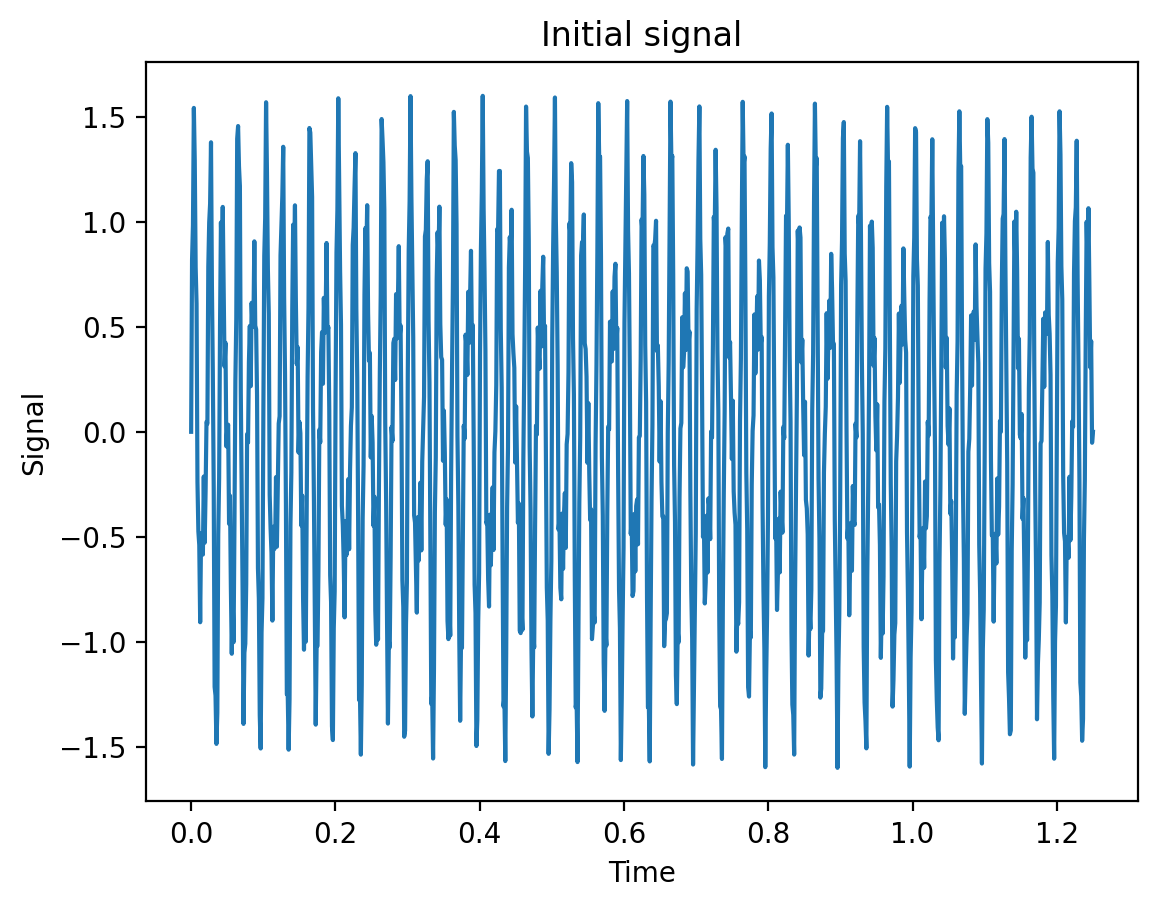

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


N = 1000
dt = 1.0 / 800.0
x = np.linspace(0.0, N*dt, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) + 0.2*np.sin(300.0 * 2.0*np.pi*x)
plt.plot(x, y)
plt.xlabel('Time')
plt.ylabel('Signal')
plt.title('Initial signal');

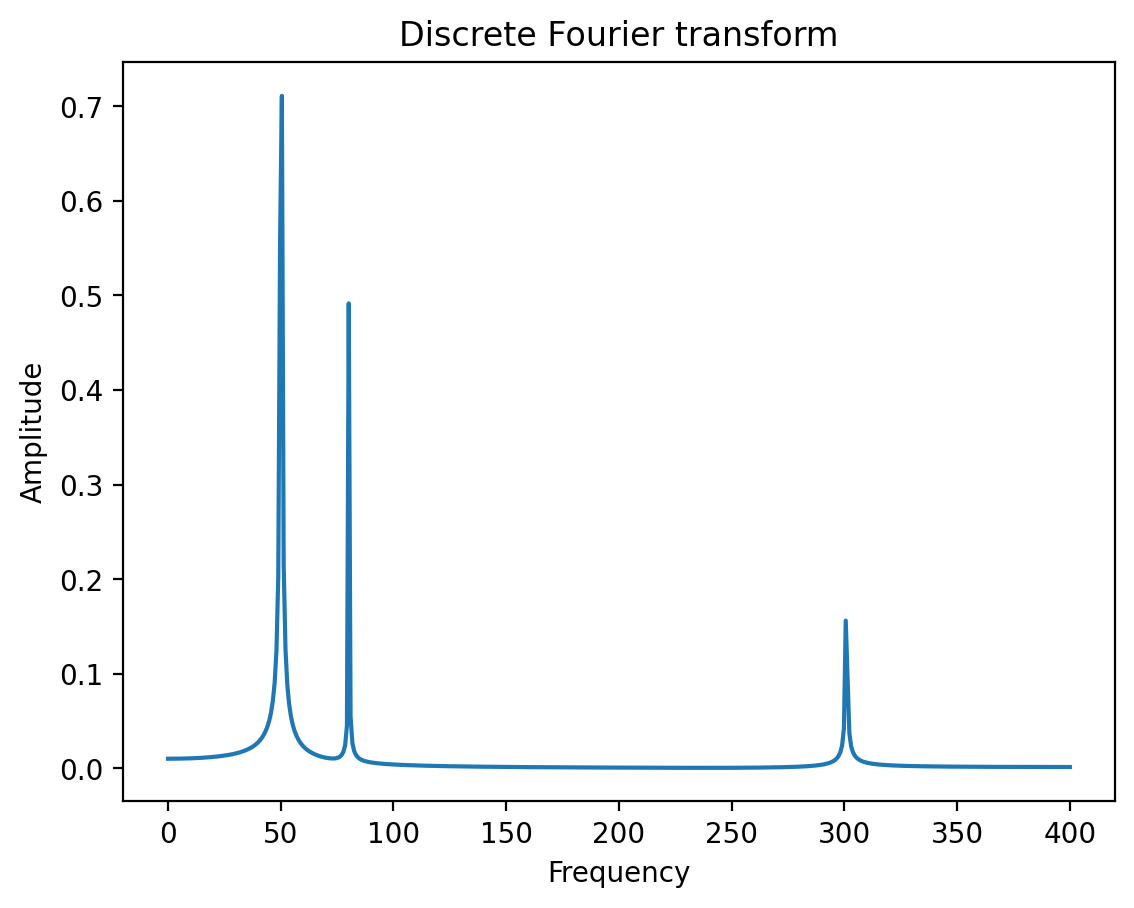

In [14]:
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*dt), N//2)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2])) #Note: N/2 to N will give negative frequencies
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Discrete Fourier transform');

## Быстрый матвек с циркулянтом

Представление $C = \frac{1}{n} F^* \text{diag}(F_n c) F_n $ даёт нам явный способ умножения вектора $x$ на $C$ за $\mathcal{O}(n\log n)$ операций. 
В самом деле

$$
Cx = \frac{1}{n} F_n^* \text{diag}(F_n c) F_n x = \text{ifft}\left( \text{fft}(c) \circ \text{fft}(x)\right)
$$

где $\circ$ обозначает поэлементное произведение (произведение Адамара) двух векторов (так как $\text{diag}(a)b = a\circ b$) и ```ifft``` обозначает обратное преобразование Фурье $F^{-1}_n$.

In [15]:
import numpy as np
import scipy as sp
import scipy.linalg

def circulant_matvec(c, x):
    return np.fft.ifft(np.fft.fft(c) * np.fft.fft(x))

n = 5000
c = np.random.random(n)
C = sp.linalg.circulant(c)
x = np.random.randn(n)


y_full = C.dot(x)
full_mv_time = %timeit -q -o C.dot(x)
print('Full matvec time =', full_mv_time.average)


y_fft = circulant_matvec(c, x)
fft_mv_time = %timeit -q -o circulant_matvec(c, x)
print('FFT time =', fft_mv_time.average)

print('Relative error =', (np.linalg.norm(y_full - y_fft)) / np.linalg.norm(y_full))

Full matvec time = 0.003517343866073393


FFT time = 0.00012038177800131962
Relative error = 1.1313542096210253e-15
